In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

train_datagen =ImageDataGenerator(width_shift_range=0.15,
        height_shift_range=0.15, shear_range=0.15,
        validation_split=0.15,
        rescale=1./255)

train_data = train_datagen.flow_from_directory(
       r'/content/drive/MyDrive/dataset-corrupted/corrupted-25/train',
        target_size=(256,256),
        batch_size=210,subset ='training',
        class_mode='categorical')
valid_data = train_datagen.flow_from_directory(
       r'/content/drive/MyDrive/dataset-corrupted/corrupted-25/train',
        target_size=(256,256),
        batch_size=128,subset ='validation',
        class_mode='categorical')

Found 3404 images belonging to 50 classes.
Found 600 images belonging to 50 classes.


In [2]:


from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.layers import GaussianNoise
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (11,11), kernel_regularizer=l2(0.001), padding = 'Same', activation ='relu', input_shape = (256,256,3)))
model.add(tf.keras.layers.Conv2D(filters = 48, kernel_size = (5,5), kernel_regularizer=l2(0.001), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = 2))
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),kernel_regularizer=l2(0.001), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))
model.add(tf.keras.layers.Conv2D(filters = 192, kernel_size = (3,3), kernel_regularizer=l2(0.001), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))
model.add(tf.keras.layers.Conv2D(filters = 192, kernel_size = (3,3), kernel_regularizer=l2(0.001), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(1024, activation = "relu", kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(512, activation = "relu", kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(512, activation = "relu", kernel_regularizer=l2(0.001)))
model.add(tf.keras.layers.Dense(50, activation = "softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 8)       2912      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 48)      9648      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 48)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     55424     
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 192)       2

In [4]:
import tensorflow.compat.v1 as tfs
gpu_options = tfs.GPUOptions(allow_growth = True)
session = tfs.InteractiveSession(config = tfs.ConfigProto(gpu_options = gpu_options))

In [5]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

csv = CSVLogger("/content/drive/MyDrive/dataset-corrupted/corrupted-25/corrupted-augu-cnn-50-model_history_log(normal).csv", append=True)
es1= tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5, restore_best_weights=True)
mc = ModelCheckpoint('/content/drive/MyDrive/dataset-corrupted/corrupted-25/corrupted-augu-cnn-50-model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [3]:

adam = tf.keras.optimizers.Adam(learning_rate = 0.01, decay = 0.9)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [8]:
history = model.fit(train_data, validation_data= valid_data,epochs = 300, callbacks = [mc,csv,es1],shuffle =True )

Epoch 1/300
17/17 [==============================] - 94s 6s/step - loss: 21.2594 - accuracy: 0.2929 - val_loss: 839.3954 - val_accuracy: 0.0200

Epoch 00001: val_accuracy did not improve from 0.02000
Epoch 2/300
17/17 [==============================] - 91s 5s/step - loss: 20.2841 - accuracy: 0.3931 - val_loss: 322.0686 - val_accuracy: 0.0200

Epoch 00002: val_accuracy did not improve from 0.02000
Epoch 3/300
17/17 [==============================] - 90s 5s/step - loss: 19.4304 - accuracy: 0.4971 - val_loss: 173.6793 - val_accuracy: 0.0217

Epoch 00003: val_accuracy improved from 0.02000 to 0.02167, saving model to /content/drive/MyDrive/dataset-corrupted/corrupted-25/corrupted-augu-cnn-50-model.h5
Epoch 4/300
17/17 [==============================] - 91s 5s/step - loss: 18.6587 - accuracy: 0.5861 - val_loss: 105.5211 - val_accuracy: 0.0200

Epoch 00004: val_accuracy did not improve from 0.02167
Epoch 5/300
17/17 [==============================] - 91s 5s/step - loss: 17.9550 - accuracy: 0

In [11]:
history = model.fit(train_data, validation_data= valid_data,epochs = 300, callbacks = [mc,csv,es1],shuffle =True )

Epoch 1/300
17/17 [==============================] - 93s 5s/step - loss: 12.8161 - accuracy: 0.9022 - val_loss: 13.7616 - val_accuracy: 0.5617

Epoch 00001: val_accuracy did not improve from 0.68667
Epoch 2/300
17/17 [==============================] - 90s 5s/step - loss: 12.6049 - accuracy: 0.9365 - val_loss: 13.5780 - val_accuracy: 0.5883

Epoch 00002: val_accuracy did not improve from 0.68667
Epoch 3/300
17/17 [==============================] - 91s 5s/step - loss: 12.4773 - accuracy: 0.9330 - val_loss: 13.4181 - val_accuracy: 0.6267

Epoch 00003: val_accuracy did not improve from 0.68667
Epoch 4/300
17/17 [==============================] - 90s 5s/step - loss: 12.3106 - accuracy: 0.9459 - val_loss: 13.2167 - val_accuracy: 0.6400

Epoch 00004: val_accuracy did not improve from 0.68667
Epoch 5/300
17/17 [==============================] - 91s 5s/step - loss: 12.2485 - accuracy: 0.9301 - val_loss: 13.1480 - val_accuracy: 0.6167

Epoch 00005: val_accuracy did not improve from 0.68667
Epoch

In [ ]:
model.save_weights('/content/drive/MyDrive/corrupted-augu/corrupted(25)-cnn-augu-dataset-50_weights.h5')

In [5]:
model.load_weights(r'D:\Uni-passau\thesis-results\50-dataset\corrupted-25-cnn-augu\corrupted(25)-cnn-augu-dataset-50_weights.h5')

In [6]:
test_datagen_nor = ImageDataGenerator(rescale=1./255)

test_datagen_aug =  ImageDataGenerator(width_shift_range=0.15,
        height_shift_range=0.15, shear_range=0.15,
        rescale=1./255)

In [ ]:
## train and valid

In [25]:
train_acc=model.evaluate(train_data)
val_acc = model.evaluate(valid_data)
print("Test_Accuracy: %.2f%%" % (train_acc[1]*100))
print("valid_Accuracy: %.2f%%" % (val_acc[1]*100))

5/5 [==============================] - 14s 3s/step - loss: 10.2912 - accuracy: 0.9150
Test_Accuracy: 96.68%
valid_Accuracy: 91.50%


In [ ]:
## corrupted test(25)normal

In [26]:
test_corrupted= test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/dataset-corrupted/corrupted-25/test',
        batch_size=128,target_size=(256,256),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1050 images belonging to 50 classes.
9/9 [==============================] - 66s 8s/step - loss: 10.1664 - accuracy: 0.9476
Test_Accuracy: 94.76%


In [ ]:
## corrupted test(25)normal augumentation

In [27]:
test_corrupted_aug= test_datagen_aug.flow_from_directory( r'/content/drive/MyDrive/dataset-corrupted/corrupted-25/test',
        batch_size=32,target_size=(256,256),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted_aug)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1050 images belonging to 50 classes.
33/33 [==============================] - 25s 747ms/step - loss: 10.1374 - accuracy: 0.9524
Test_Accuracy: 95.24%


In [ ]:
## normal dataset

In [45]:
test_genrator_nor = test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/dataset-50/nor-dataset-50/test',
       batch_size=128,target_size=(256,256),
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_nor)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
11/11 [==============================] - 61s 6s/step - loss: 408.9206 - accuracy: 0.0200
Test_Accuracy: 2.00%


In [ ]:
## normal data with augumentation

In [17]:
test_genrator_aug = test_datagen_aug.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\dataset-50\test',
        batch_size=128,target_size=(256,256),
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_aug)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
11/11 [==============================] - 117s 11s/step - loss: 271.2377 - accuracy: 0.0200
Test_Accuracy: 2.00%


In [ ]:
## corrupted-10

In [8]:
test_genrator_cor10 = test_datagen_aug.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-10',
       batch_size=80,target_size=(256,256),
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_cor10)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
17/17 [==============================] - 119s 7s/step - loss: 63.5838 - accuracy: 0.2323
Test_Accuracy: 23.23%


In [ ]:
## corrupted-20

In [26]:
test_corrupted_nor= test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-20',
        batch_size=128,target_size=(256,256),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted_nor)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
11/11 [==============================] - 83s 8s/step - loss: 10.8110 - accuracy: 0.8174
Test_Accuracy: 81.74%


In [27]:
test_corrupted_aug= test_datagen_aug.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-20',
        batch_size=128,target_size=(256,256),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted_aug)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
11/11 [==============================] - 83s 8s/step - loss: 10.7266 - accuracy: 0.8346
Test_Accuracy: 83.46%


In [ ]:
## corrupted - 30 augu

In [11]:
test_genrator_cor30 = test_datagen_aug.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-30',
        batch_size=80,target_size=(256,256),
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_cor30)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
17/17 [==============================] - 101s 6s/step - loss: 10.3956 - accuracy: 0.8923
Test_Accuracy: 89.23%


In [ ]:
## corrupted- 40 augu

In [10]:
test_genrator_cor40 = test_datagen_aug.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-40',
        batch_size=80,target_size=(256,256),
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_cor40)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
17/17 [==============================] - 117s 7s/step - loss: 12.3895 - accuracy: 0.4477
Test_Accuracy: 44.77%


In [ ]:
## corrupted-50

In [19]:
test_corrupted_aug2= test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-50\test',
        batch_size=128,target_size=(256,256),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted_aug2)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
11/11 [==============================] - 76s 7s/step - loss: 14.0931 - accuracy: 0.1008
Test_Accuracy: 10.08%


In [18]:
test_corrupted_aug2= test_datagen_aug.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-50\test',
        batch_size=128,target_size=(256,256),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted_aug2)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
11/11 [==============================] - 115s 10s/step - loss: 27.3025 - accuracy: 0.1677
Test_Accuracy: 16.77%


In [ ]:
## gaussian

In [15]:
test_genrator_aug = test_datagen_aug.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\gaussian-50\test',
        target_size=(256,256),
        batch_size=100,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_aug)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
13/13 [==============================] - 185s 14s/step - loss: 393.2292 - accuracy: 0.0177
Test_Accuracy: 1.77%


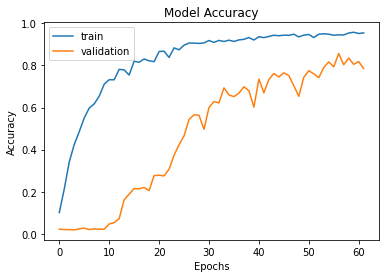

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('/content/drive/MyDrive/corrupted-augu/corrupted(25)-cnn-augu-dataset-50-accuracy.png')
plt.show()

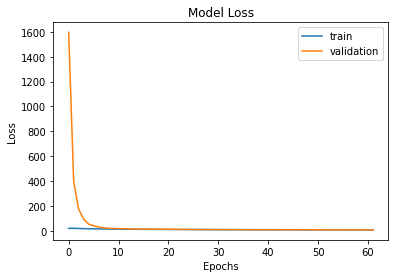

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('/content/drive/MyDrive/corrupted-augu/corrupted(25)-cnn-augu-dataset-50-loss.png')
plt.show()